[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/USERNAME/REPOSITORY/blob/BRANCH/NOTEBOOK.ipynb)

# **📊 Aholining sog‘liqni saqlash ko‘rsatkichlari**

## **1-qadam. Kutubxonalarni chaqirish**  

Kerakli kutubxonalarni chaqiramiz:  
- `wbdata` – Jahon banki API orqali sog‘liq bo‘yicha ma’lumotlarni olish  
- `pandas` – jadval shaklida ishlash  
- `matplotlib` – grafiklar chizish  


In [19]:
!pip install wbdata --quiet

import wbdata
import pandas as pd
import matplotlib.pyplot as plt

## **2-qadam. Indikatorlarni tanlash**  

Aholi sog‘liqni saqlash ko‘rsatkichlari uchun tanlaymiz:  
- `SP.DYN.LE00.IN` – Umr davomiyligi (yillar)  
- `SH.DYN.MORT` – Bola o‘limi (1000 tug‘ilishdan)  
- `SH.XPD.CHEX.PC.CD` – Sog‘liq uchun xarajat (USD jon boshiga)  


In [20]:
indicators = {
    "SP.DYN.LE00.IN": "Umr davomiyligi",
    "SH.DYN.MORT": "Bola o‘limi",
    "SH.XPD.CHEX.PC.CD": "Sog‘liq uchun xarajat",
}

## **3-qadam. Ma’lumotlarni yuklab olish**  

Ma’lumotlarni **Butun dunyo (WLD)** bo‘yicha yuklab olamiz.  

In [21]:
df = wbdata.get_dataframe(indicators, country="WLD")

## **4-qadam. Vaqtni tayyorlash va saralash**  

Indexni sanaga o‘tkazamiz va yillar bo‘yicha tartiblaymiz.  

In [22]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

## **5-qadam. Oraliqni tanlash**  

1980–2024 yillar oralig‘ini ko‘rib chiqamiz.  

In [23]:
# 1980–2024 yillarni tanlash
df = df.loc["1980":"2024"]

## **6-qadam. Grafik chizish**  

Umr davomiyligi, bola o‘limi va sog‘liq uchun xarajatlarni chizamiz.  


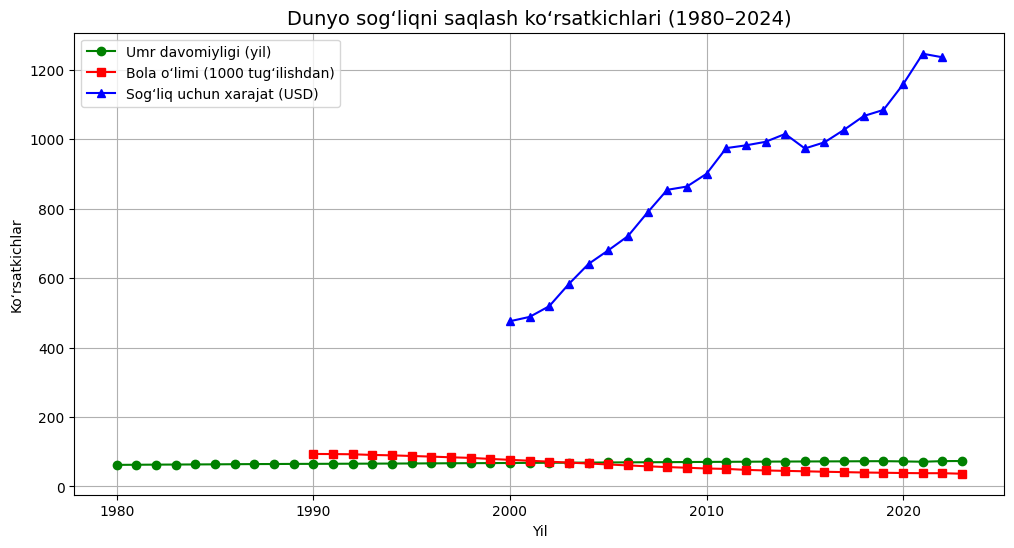

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(df.index.year, df["Umr davomiyligi"], marker="o", label="Umr davomiyligi (yil)", color="green")
plt.plot(df.index.year, df["Bola o‘limi"], marker="s", label="Bola o‘limi (1000 tug‘ilishdan)", color="red")
plt.plot(df.index.year, df["Sog‘liq uchun xarajat"], marker="^", label="Sog‘liq uchun xarajat (USD)", color="blue")

plt.title("Dunyo sog‘liqni saqlash ko‘rsatkichlari (1980–2024)", fontsize=14)
plt.xlabel("Yil")
plt.ylabel("Ko‘rsatkichlar")
plt.legend()
plt.grid(True)
plt.show()